In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import squarify
from math import pi

In [3]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


## Day 20 visualizing "Tree Map"

In [2]:
df = sns.load_dataset("iris")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## A tree map is a visualization tool that displays hierarchical data as nested rectangles, where the size and color of each rectangle represent different attributes of the data. It is used to show proportions within a hierarchy, making it easy to compare the relative sizes of categories and subcategories. Tree maps are best used when you need to visualize large amounts of hierarchical data in a compact and intuitive format.









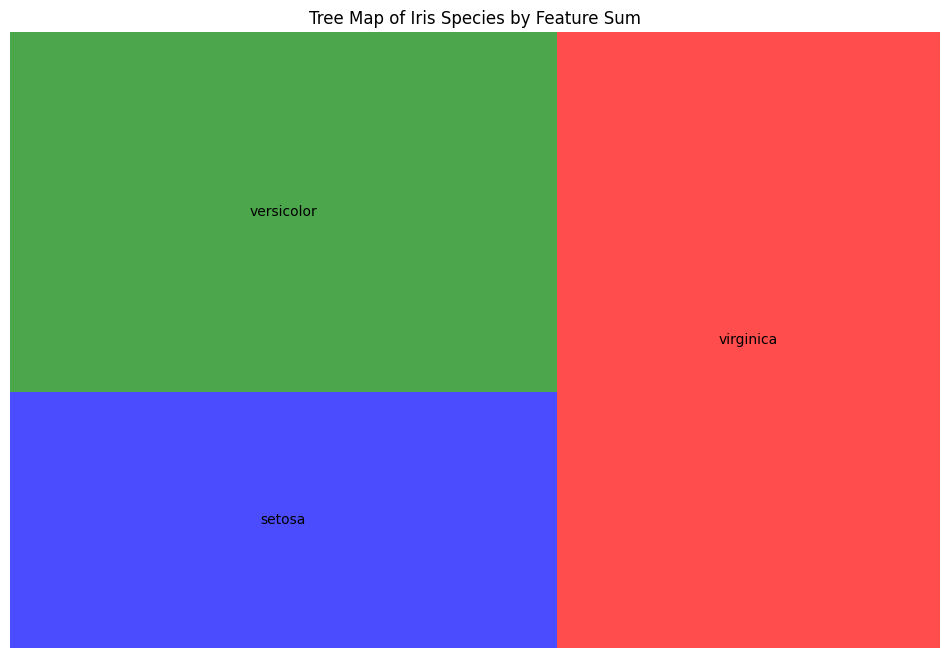

In [6]:
# Calculate the mean for each species
df_mean = df.groupby('species').mean().reset_index()

# Create a new column for area size (sum of means of all features)
df_mean['area'] = df_mean[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].sum(axis=1)

# Prepare data for squarify
labels = df_mean['species']
sizes = df_mean['area']
colors = ['blue', 'green', 'red']

# Create the tree map
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.title('Tree Map of Iris Species by Feature Sum')
plt.axis('off')  # Turn off axis
plt.show()

In [7]:
df1 = sns.load_dataset("tips")
df1.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\arora\AppData\Local\Temp\ipykernel_6448\874645484.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1_mean = numeric_df1.groupby('sex').mean().reset_index()


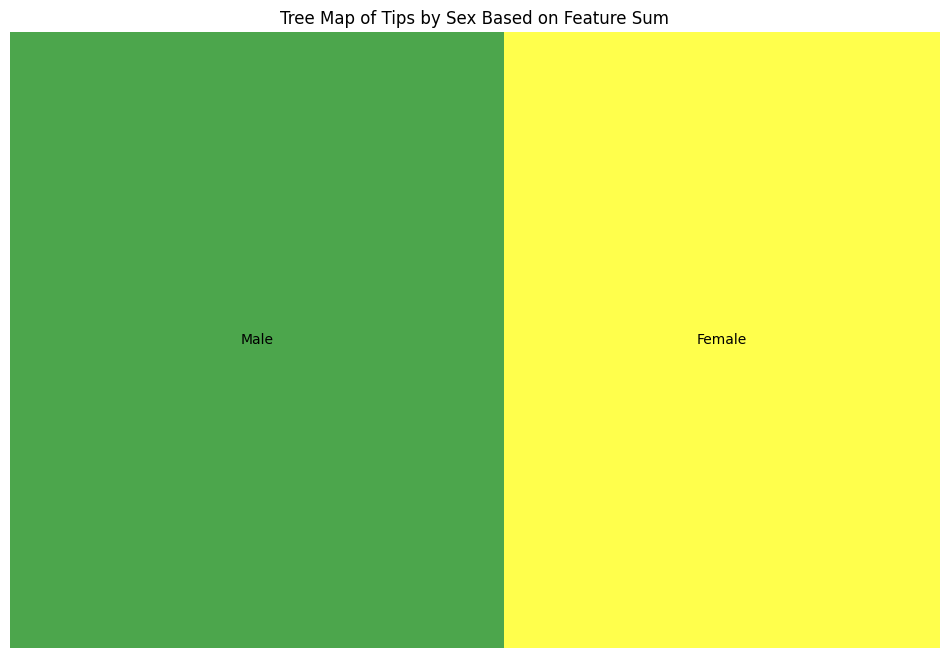

In [10]:
# Exclude non-numeric columns before performing the mean calculation
numeric_df1 = df1.select_dtypes(include=[np.number])

# Add the 'sex' column back to the numeric dataframe for grouping
numeric_df1['sex'] = df1['sex']

# Calculate the mean for each sex
df1_mean = numeric_df1.groupby('sex').mean().reset_index()

# Create a new column for area size (sum of means of all features)
df1_mean['area'] = df1_mean[['total_bill', 'tip', 'size']].sum(axis=1)

# Prepare data for squarify
labels = df1_mean['sex']
sizes = df1_mean['area']
colors = ['green', 'yellow']  # Only two colors needed for 'sex'

# Create the tree map
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.title('Tree Map of Tips by Sex Based on Feature Sum')
plt.axis('off')  # Turn off axis
plt.show()